Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your collaborators below:

In [1]:
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# special imports for computing mds and dendrograms
from representations import mds, plot_dendrogram

In this problem, we will explore the MDS (Multi-Dimensional Scaling) algorithm, which is is a procedure for transforming an array of pairwise distances back into the points that generated them. MDS has additionally been used by cognitive scientists to create spatial representations of the similarities among a set of stimuli.

---
## Part A (1 point)

Alyssa P. Hacker and Ben Bitdiddle are playing a game. Ben thinks of a shape, and then finds the distances between all the vertices of the shape. He then tells Alyssa what the distances between the vertices are, and Alyssa has to guess what the shape is. To begin, Ben gives Alyssa the following pairwise distances:

In [3]:
shape_data = np.load("data/shape.npy")
shape_data

array([[ 0.        ,  1.41460942,  3.73533076,  3.87653275,  1.56487081,
         0.44290686,  1.57879807,  2.48820976,  1.76912434,  0.52183108],
       [ 1.41460942,  0.        ,  1.38455232,  3.55283339,  3.73107995,
         0.41997598,  0.37901174,  1.63843624,  2.38032639,  1.66237917],
       [ 3.73533076,  1.38455232,  0.        ,  1.2436466 ,  3.61609586,
         1.64683317,  0.48404899,  0.42033858,  1.58202263,  2.31082687],
       [ 3.87653275,  3.55283339,  1.2436466 ,  0.        ,  1.47740542,
         2.41698011,  1.62227382,  0.37433128,  0.44797643,  1.62240421],
       [ 1.56487081,  3.73107995,  3.61609586,  1.47740542,  0.        ,
         1.71490194,  2.36399763,  1.6097853 ,  0.4331262 ,  0.43317642],
       [ 0.44290686,  0.41997598,  1.64683317,  2.41698011,  1.71490194,
         0.        ,  0.35382313,  1.07937493,  1.08662342,  0.42792882],
       [ 1.57879807,  0.37901174,  0.48404899,  1.62227382,  2.36399763,
         0.35382313,  0.        ,  0.44261487

Alyssa knows that just by looking at the distances between the points, she can't tell what the shape originally was. However, Alyssa took CogSci 131 and therefore also knows that she can use the MDS (Multi-Dimensional Scaling) algorithm to transform these distances into points.

We have provided you with a function, `mds`, which performs the MDS algorithm. Look at the documentation for the function to figure out how to call it:

In [4]:
mds??

<div class="alert alert-success">Then, in the following cell, write code to perform MDS on the shape data that Ben gave Alyssa. Save the output of the MDS algorithm into a variable called `shape_points`, and then plot the points as black dots. Make sure you include a title for your plot. Additionally, set the axis limits to `[-1, 1]` for both the x-axis and the y-axis. Your solution can be done in 5 lines of code.</div>

_Hint:_ For a quick refresher on constructing plots with matplotlib, take a look at the Problem Set 0 notebook "Manipulating and Plotting Data" or the tutorial [here](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb).

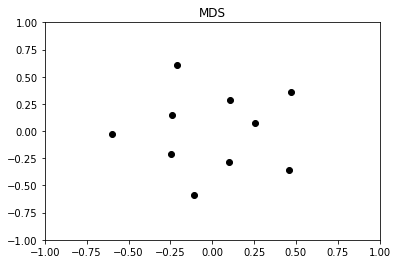

In [5]:
# load the data
shape_data = np.load("data/shape.npy")

# create the figure
fig, axis = plt.subplots()

# YOUR CODE HERE
shape_points = mds(shape_data)
axis.set_title("MDS")
axis.set_ylim([-1, 1])
axis.set_xlim([-1, 1])
axis.plot([x[0] for x in shape_points], [y[1] for y in shape_points], "ko")

In [6]:
"""Check that MDS was correctly used on the shape data and that the points were plotted."""
from numpy.testing import assert_array_equal, assert_almost_equal
from nose.tools import assert_equal, assert_not_equal
from plotchecker import ScatterPlotChecker

# check that shape_data hasn't changed
assert_array_equal(shape_data, np.load("data/shape.npy"))

# check that shape points has the correct shape and type
assert_equal(shape_points.shape, (10, 2), "incorrect shape of shape_points")
assert_equal(shape_points.dtype, np.float64, "incorrect data type of shape_points")

# check the correct data was plotted
pc = ScatterPlotChecker(axis)
pc.assert_x_data_equal(shape_points[:, 0])
pc.assert_y_data_equal(shape_points[:, 1])

# check that the plotted data has the correct values
vals = [(1, 0.60353738), (4, 0.4613193), (-2, -0.24098396), (-6, 0.10159001), (-10, 0.10731944)]
for (idx, val) in vals:
    assert_almost_equal(shape_points.flatten()[idx], val, 6, "incorrect entry within kinship_points")

# check that black circles were used
pc.assert_colors_equal('k')

# check that a title was included
pc.assert_title_exists()

# check that axis limits were set
pc.assert_xlim_equal((-1, 1))
pc.assert_ylim_equal((-1, 1))

print("Success!")

Success!


<div class="alert alert-success">What is the shape that Ben was thinking of?</div>

A star!

<div class="alert alert-success">Give a brief explanation of what the MDS algorithm does. That is, what is it doing when it goes from a $n\times n$ array of distances to an array of $n$  2D points?</div>

When the MDS algorithm goes from the array of distances to the 2D array of points, it tries to fit all the points in a graph while preserving their respective distances as well as possible, and in doing such, maps points in a way that the ones that are alike are more closely grouped together. Thus the MDS algorithm essentially maps a psychological space by showing the similarity of the points in a dataset. 

---
## Part B (1 point)

Satisfied that she was able to correctly guess Ben's shape, Alyssa starts thinking about other cool ways that the MDS algorithm could be used. She remembers talking about various notions of *similarity* from CogSci 131, and wonders if the MDS algorithm could be used as a way to represent psychological similarity.

Being the aspiring cognitive scientist that she is, Alyssa goes ahead and collects some similarity judgments about different kinds of musical genres. That is, she asks several people to rank the similarity of (for example) jazz piano and heavy metal rock, averages all the responses, and then scales the data to lie between 0 and 1. She saves her similarity data in the file `music_similarities.npz` and the names of musical genres in `music_list.npz`

In [7]:
music_similarities = np.load("data/music_similarities.npz")['data']
music_names = np.load("data/music_list.npz")['data']

This music_similarities file contains Alyssa's similarity matrix, and the music_names file contains the names of the music she used in her experiment on musical similarity.

In [8]:
music_names

array(['country', 'classical rock', 'big band', 'jazz piano',
       'heavy metal', 'blues', 'alternative rock', 'jazz vocals',
       'classical piano', 'flamenco guitar', 'classical cello', 'bluegrass'], 
      dtype='<U16')

The other is a $12\times 12$ matrix of similarities where index $(i,j)$ lists the similarity between the kinship term in `names[i]` and the kinship term in `names[j]`:

In [9]:
music_similarities

array([[ 1.        ,  0.19557398,  0.08017857,  0.05327806,  0.3167602 ,
         0.0034949 ,  0.24709184,  0.05983418,  0.08734694,  0.11965561,
         0.00653061,  0.00669643],
       [ 0.19557398,  1.        ,  0.13020408,  0.39118622,  0.38071429,
         0.10742347,  0.63563776,  0.07559949,  0.31561224,  0.24243622,
         0.31841837,  0.27072704],
       [ 0.08017857,  0.13020408,  1.        ,  0.01788265,  0.06780612,
         0.02966837,  0.06732143,  0.12543367,  0.18173469,  0.09813776,
         0.3327551 ,  0.12563776],
       [ 0.05327806,  0.39118622,  0.01788265,  1.        ,  0.16566327,
         0.00487245,  0.33997449,  0.02440051,  0.05375   ,  0.13733418,
         0.05696429,  0.13871173],
       [ 0.3167602 ,  0.38071429,  0.06780612,  0.16566327,  1.        ,
         0.03897959,  0.87012755,  0.17989796,  0.32701531,  0.28844388,
         0.21528061,  0.10905612],
       [ 0.0034949 ,  0.10742347,  0.02966837,  0.00487245,  0.03897959,
         1.        ,  

Alyssa remembers that the MDS algorithm takes pairwise *distances*; however, her behavioral data is of pairwise *similarities*. Thus, Alyssa must transform her data into *dissimilarities*. Because the data lies between 0 and 1, a simple way to do this is just to subtract the similarities from 1.

<div class="alert alert-success">Help Alyssa visualize her musical similarity data by writing code to compute the 2D points from the similarity data, and plot the points along with labels stating which points correspond to which music genres. Store the output of the `mds` algorithm in a variable called `music_points`. Don't forget to include a title for your plot!</div>

*Hint*: you can add a text label using the `axis.text` command. You may also want to prepend some spaces to the beginning of each label so that they don't overlap with the points!

In [10]:
# get a handle to an axis object, then close the plot
axis = plt.gca()
plt.close()

# look up documentation on axis.text
axis.text?

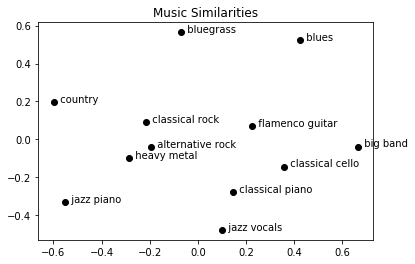

In [11]:
music_names = np.load("data/music_list.npz")['data']
music_similarities = np.load("data/music_similarities.npz")['data']

# create the figure
fig, axis = plt.subplots()

# YOUR CODE HERE
axis.set_title("Music Similarities")
m_s = music_similarities.copy()
m_s[:] = [1-x for x in m_s]
music_points = mds(m_s)
music_zip = list(zip(music_names, m_s))
axis.plot([x[0] for x in music_points], [y[1] for y in music_points], "ko")
n=0
for elem in music_points:
    axis.text(elem[0], elem[1], "  " + music_zip[n][0])
    n = n+1     

In [12]:
"""Check that MDS was correctly used on the music data and that the points were plotted."""
from numpy.testing import assert_array_equal, assert_almost_equal
from nose.tools import assert_equal, assert_not_equal
from plotchecker import ScatterPlotChecker

names = np.load("data/music_list.npz")['data']
similarities = np.load("data/music_similarities.npz")['data']

assert_equal(list(music_names), list(names), "music_names array has changed")
assert_array_equal(music_similarities, similarities, "music_similarities array has changed")

# check that music_points has the correct shape and type
assert_equal(music_points.shape, (12, 2), "incorrect shape of music_points")
assert_equal(music_points.dtype, np.float64, "incorrect data type of music_points")

# check the correct data was plotted
pc = ScatterPlotChecker(axis)
pc.assert_x_data_equal(music_points[:, 0])
pc.assert_y_data_equal(music_points[:, 1])

# check that the plotted data has the correct values
vals = [(0, -0.59924511), (1, 0.19729266), (2, -0.21593404), (3, 0.09087466), (4, 0.66645917)]
for (idx, val) in vals:
    assert_almost_equal(music_points.flatten()[idx], val, 6, "incorrect entry within music_points")

# check that black circles were used
pc.assert_colors_equal('k')

# check that a title was included
pc.assert_title_exists()

# check that the labels are correct
pc.assert_textlabels_equal(music_names)
pc.assert_textpoints_equal(music_points)

print("Success!")

Success!


---

## Part C (0.5 points)

<div class="alert alert-success">By looking at the graph from Part B, can you identify any **pairs** of points that have similar distances on the 2D plane, but which have different relationships conceptually?</div>

(heavy metal, classical piano) and (bluegrass, blues) have similar distances from each other, but I would definitely say bluegrass and blues are much more similar than heavy metal and classical piano, conceptually. 

---

## Part D (0.5 points)

<div class="alert alert-success">Overall, how well does the spatial representation produced by the MDS algorithm capture your intuitions about the similarities between these musical categories? Justify your answer.</div>

Overall, I would say this spatial representation captures a *majority* of my intuitions about the similarities between these music categories. However, I would probably change a few of the plots: country, blues, and bluegrass should be much closer together, jazz vocals and jazz piano should be closer, put heavy metal further away from country than bluegrass (bluegrass is currently further away), and put the jazz genres closer to classical than country. Other than thesse, I would say this MDS algorithm does a substantial job in categorizing the similarities based on rythm, speed, and style of each genre.

---

## Part E (1 point)

Being a polymath with a wide range of interests, and being especially interested in ways of visualizing psychological similarity data, Alyssa obtained similarity judgments about kinship relations, for example: how similar is an aunt to a nephew? And how similar is a daughter to a grandmother? Her similarity data, and the list of kinship category names she used in her new experiment are conveniently stored in an npz file (which are loaded below).

She decides to try a different way of representing her kinship data (a different representation than the one she used for musical categories). She has heard of a special type of plot called a "dendrogram", which will create a hierarchical clustering based on the similarities (e.g., as opposed to a spatial layout).

We have provided for you a `plot_dendrogram` function that will perform hierarchical clustering and then create a dendrogram plot for you:

In [13]:
# The kinship similarity data
kinship_data = np.load("data/kinship.npz")

# the list of names
kinship_names = list(kinship_data['names'])
print(kinship_names)

# The similarity matrix
kinship_similarities = kinship_data['similarities']

['aunt', 'daughter', 'father', 'granddaughter', 'grandfather', 'grandmother', 'grandson', 'mother', 'nephew', 'niece', 'son', 'uncle']


In [14]:
plot_dendrogram??

<div class="alert alert-success">From the documetation, figure out how to call the `plot_dendrogram` function with the kinship data, and then call the function in the following cell. Save the output of `plot_dendrogram` into a variable called `kinship_dissimilarities`. Make sure you add a title to your plot as well. Your solution can be done in 2 lines of code.</div>

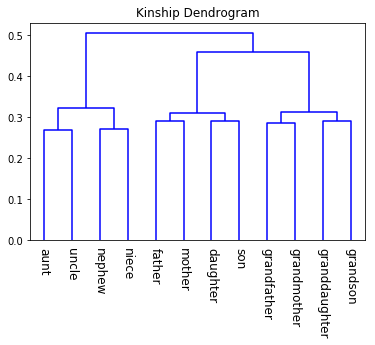

In [15]:
# load the kinship data
kinship_data = np.load("data/kinship.npz")
kinship_names = list(kinship_data['names'])
kinship_similarities = kinship_data['similarities']

# create the figure
fig, axis = plt.subplots()

# YOUR CODE HERE
axis.set_title("Kinship Dendrogram")
kinship_dissimilarities = plot_dendrogram(axis, kinship_similarities, kinship_names)

In [16]:
"""Check that the dendrogram function was correctly used for the kinship data."""
from numpy.testing import assert_array_equal
from nose.tools import assert_equal, assert_not_equal
from plotchecker import PlotChecker

# check that the kinship data hasn't changed
kd = np.load("data/kinship.npz")
assert_equal(kinship_names, list(kd['names']), "kinship_names array has changed")
assert_array_equal(kinship_similarities, kd['similarities'], "kinship_similarities array has changed")

# check that a title was included
pc = PlotChecker(axis)
pc.assert_title_exists()

# check that the labels are correct
labels = ["aunt", "uncle", "nephew", "niece", "father", "mother", "daughter", 
          "son", "grandfather", "grandmother", "granddaughter", "grandson"]
pc.assert_xticklabels_equal(labels)

# check that the dissimilarities are correct
assert_array_equal(kinship_dissimilarities, 1 - kinship_similarities, "kinship dissimilarities are incorrect")

print("Success!")

Success!


<div class="alert alert-success">How well do the results of the hierarchical clustering capture your intuitions about the similarity of the kinship terms? Justify your answer.</div>

I believe the results are pretty intuitive for me, and I would say that the dendrogram accurately clusters them accordingly except for one part: grandson and granddaughter should not be clustered with grandfather and granddaughter, rather in the daughter / son hierarchy because I believe they share more similarities with this cluster than the grandfather and grandmother hierarchy. Other than that, I believe all the other ones are hierarchically clustered accurately. 

---

Before turning this problem in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

<div class="alert alert-danger">After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.</div>

In [17]:
print("No errors!")

No errors!
